# Before starting the note...
Useful tips for jupyter notebook:

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [13]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
#environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [14]:
us = environment.UserSettings()
#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
%load_ext music21.ipython21

The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21


# 楽譜を構成する部品のヒエラルヒー 
## Music21のチュートリアルの構成（score, part, measure）

scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ、というのが基本的なScoreの構成

## deep jazzの場合のヒエラルヒー（上記と異なる）

deepjazzの例では

Score (midi_data) > Part (melody_stream) > Voice (melody1,2 , melody_voice) ＞ Note

という階層に従ってデータを切り出しているように見える。
すなわちPartはMeasureを持たず、その代わり（？）にVoiceを持っている：

In [ ]:
s_jazz = converter.parse('C:/Users/t/PycharmProjects/deepjazz_in_a_file/midi/original_metheny.mid')

In [16]:
s_jazz_parts = [x for x in s_jazz.getElementsByClass(stream.Part)]
len(s_jazz_parts)

19

直接の構成要素はPart:

In [17]:
[type(x) for x in s_jazz]

[music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part,
 music21.stream.Part]

partは楽器が指定してあったりなかったり。

In [18]:
[x.getInstrument() for x in s_jazz.getElementsByClass(stream.Part)]

[<music21.instrument.Instrument Piano>,
 <music21.instrument.Instrument Acoustic Bass>,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument Electric Guitar>,
 <music21.instrument.Instrument Trumpet>,
 <music21.instrument.Instrument Horn>,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument Piano>,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >,
 <music21.instrument.Instrument : >]

In [19]:
s_jazz_part0_voices = [x for x in s_jazz_parts[0].getElementsByClass(stream.Voice)]
len(s_jazz_part0_voices)

5

partの構成要素であるvoiceにも同様にinstrumentが指定してある。

同じパートの中には別の楽器をいれることはできない。従って、パート内のvoiceは楽器を保持しているが、すべて同一：

In [21]:
[[x.getInstrument() for x in y.getElementsByClass(stream.Voice)] for y in s_jazz_parts]

[[<music21.instrument.Instrument Piano>,
  <music21.instrument.Instrument Piano>,
  <music21.instrument.Instrument Piano>,
  <music21.instrument.Instrument Piano>,
  <music21.instrument.Instrument Piano>],
 [],
 [<music21.instrument.Instrument >,
  <music21.instrument.Instrument >,
  <music21.instrument.Instrument >,
  <music21.instrument.Instrument >],
 [<music21.instrument.Instrument >,
  <music21.instrument.Instrument >,
  <music21.instrument.Instrument >,
  <music21.instrument.Instrument >],
 [],
 [<music21.instrument.Instrument Electric Guitar>,
  <music21.instrument.Instrument Electric Guitar>],
 [<music21.instrument.Instrument Trumpet>,
  <music21.instrument.Instrument Trumpet>,
  <music21.instrument.Instrument Trumpet>,
  <music21.instrument.Instrument Trumpet>],
 [<music21.instrument.Instrument Horn>, <music21.instrument.Instrument Horn>],
 [<music21.instrument.Instrument >, <music21.instrument.Instrument >],
 [<music21.instrument.Instrument >,
  <music21.instrument.Instrument

次のセルはエラーになる：

In [8]:
s_jazz_part0_voices.show()

AttributeError: 'list' object has no attribute 'show'

次のセルは表示することはするがreadableでない：

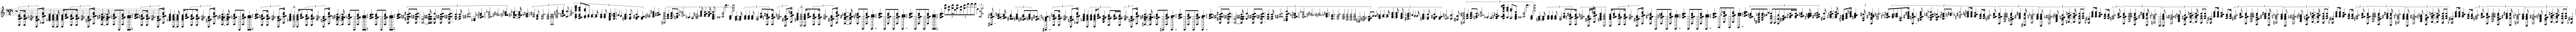

In [9]:
s_jazz_part0_voices[0].show()

VoiceのなかにMeasureがあるかと思いきやそんなものはない：

In [10]:
len(s_jazz_part0_voices[0].getElementsByClass(stream.Measure))

0

ではなにが入っているかといえば、（ScoreのなかのPartのなかの）各PartのVoice[0]はおおむねChordから構成されている（他はnote.Rest, note.Noteが少々）：

例外はメロディであるところのpart#5(すなわち６番目のパート)

In [11]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[0][0:20]])

"<class 'music21.note.Rest'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>   <class 'music21.note.Note'>   <class 'music21.chord.Chord'>   <class 'music21.chord.Chord'>"

おそらく各パートのvoice[1]以降はおおむねnoteから構成されている（？）

であるが、deepjazzでchordパートを切り出す際にはそのように決め打つことなく、solo_stream[0]からremoveByClassでnoteを除外しつつすべてのchordを抽出している。
また、melodyパートはsolo_stream[-1]から特に除外操作をすることなくすべてのnoteを抽出できている（？）

In [11]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[1][0:20]])

"<class 'music21.note.Rest'>   <class 'music21.note.Note'>   <class 'music21.note.Rest'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>   <class 'music21.note.Note'>"

# deep jazzにおける measures, chordsの生成手順

## flat化およびvoice, partの使い分けについて

- ひとつのpartのなかの複数のvoiceはflat化してひとつのvoiceに収納することが合理的な前処理 
- ただし、複数の楽器をまとめたオブジェクトの構成部品はpartでなくてはならないので、上記の処理をしたのちにpart化して、solo_streamに突っ込む
- ところがこのsolo_streamがvoiceなんだな・・・。scoreのほうが合理的ではないだろうか？？？
    - 以下のいずれもオッケーなのでどうでもよい？    

In [36]:
parent = stream.Voice()
child = stream.Part()
parent.append(child)

In [37]:
parent = stream.Part()
child = stream.Voice()
parent.append(child)

In [38]:
parent = stream.Part()
child1 = stream.Voice()
child1.append(instrument.ElectricGuitar())
parent.append(child1)
child2 = stream.Voice()
child2.append(instrument.Piano())
parent.append(child2)

In [39]:
parent.getInstruments()

<music21.stream.Part 0xbc7a048>

In [40]:
parent = stream.Voice()
child1 = stream.Part()
child1.append(instrument.ElectricGuitar())
parent.append(child1)
child2 = stream.Part()
child2.append(instrument.Piano())
parent.append(child2)

In [41]:
parent.getInstruments()

<music21.stream.Voice 0xbc75080>

In [42]:
child2.getInstrument()

<music21.instrument.Instrument Piano>

## 伴奏パートをcomp_streamに

- part 0 , 1 , 6 ,7(accompaniment=伴奏)をflat化したのち、comp_streamに突っ込む
 - part 0は以下のような感じで和音が入っている(Piano?)
<img src = "comp_stream0.png">
 - part 1 は以下のような感じで単音で入っている(Acoustic Bass?)
 <img src = "comp_stream1.png">

## メロディパートも含めてfull_streamに収納し、伴奏つきソロであるあたりを切り取ってsolo_streamに収納
- comp_streamの構成要素をそのままfull_streamに収納
- さらにメロディーパートであるPart 5(Electric Guitar?)をfull_streamに格納
- offset 476から548が伴奏つきソロ（jazzのソロとはサビみたいなものか？）なのでそこを切り取って、voiceだったのをpartに変換して、solo_streamに格納

memo : Piano（パート0)が和音を担当し、melody（Electric Guitar, part 5)のその周りでのdynamicsを記述するというピクチャーか？
それだと、その他のpartの役割がわからない。to be figured outだが、
- solo_streamは最初のpart(ピアノ・和音)と最後のpart(Electric Guitar・メロディ)以外使われている形跡がない



## メロディーパート（#5）をmeasure(小節)にわける


- offset/4をint化したものでgroup化して、orderedDictたるmeasuresに突っ込む4

## ピアノパート(#5)に関しても同じことをする
- ただし、こちらはコード（和音）のみ収録（noteは明示的に取り除いている）
- 収納先はやはりorderedDictであるchords
- そのあと、measuresが長さ１９であるのに、chordsが２０あるので、最後の要素を削除している（何故違うといけないのかは要解明）

# parse_melodyループの詳細

## まず小節ごとにそのなかの旋律（？）をmに、和音をcに格納

## m,c をparse_melodyにかける

### それぞれ,measure, chordsにコピーして、measureはnote,終止符以外、chordsは和音以外を削除

### measureの最初の音のオフセットを４の倍数に切り捨ててmeasureStartTimeに格納

### measure内の各note(nr)に関するループ

#### nr以前（同時を含む）の最後の和音をlastChordにアサイン

#### lastChordとnrとの関係性を用いてSymbolを決定
ここでabstract grammarを用いる。詳しくは次章参照。
- メロディの音 $\in$ 和音の属する音階を決定し、その音階に入っている音 $\Rightarrow$ Symbol S
    - ドリアンスケールを前提として、和音の属する音階（スケール）を決定する。
    - その音階(例：B-ドリアン等々)には、例えば下の「ド」から上の「ド」までの、８音が含まれる
    - 従って８音のどれかかどうかの判定になる
- メロディの音 $\in$ 和音に入っている音 $\Rightarrow$ Symbol C
    - 例えばドミソの３音のどれかかどうかの判定
- メロディの音 $\in$ 前後賞 $\Rightarrow$ Symbol A
- メロディの音 == 休止符 $\Rightarrow$ Symbol R
- メロディの音がそれ以外 $\Rightarrow$ Symbol X

#### 次に（おそらく）旋律（melody）と和音の関係の持続時間をdiffに格納。が使われていない

#### noteInfoに上記のSymbolと旋律の長さを格納

#### intervalInfoを格納
- 例えば直前の旋律と同じ音がもう一度鳴ったとする（ド $\rightarrow$ ド　など）
- これは完全一度(P1)
    - P1に短３度（すなわち半音２つ分？？わかりにくい！）足すとm3になる
    - P1から短３度引くとm-3になる
- m3, m-3をまとめて<>で囲んで<m3,m-3>のようにしてintervalInfoとする。

#### noteInfoとIntervalInfoを文字列として結合し、fullGrammerの後ろに文字列として追加

# abstract grammar
abstract grammarは
http://ai.stanford.edu/~kdtang/papers/smc09-jazzgrammar.pdf
に記述がある。以下解読を試みる

## Abstract grammarのSymbol
### abstract_grammar論文のSymbol S
deep jazzの__is_scale_toneではドリアンスケールを前提として和音が属している（deriveで推定）音階（Scale）に入っている音かどうかを判定している

### Symbol C
和音自体の構成音とのマッチング判定をしている

### Symbol A
和音の構成音±１かどうかを判定

（Δ 1 2 S8 S8 S8)は
- 上記の分類でSとなる八分音符が音が高くなる形で３つ続く
- 各音の間のpitchは最低で１半音、最大で２半音

であることを意味している

このabstract grammarのポイント
- 「上がり始めるとしばらく上がっている傾向が強い」というmomentum的な傾向があること
- 上昇・下降スピードが一定範囲以内であればある種の同一視が可能なこと


- 上昇・下降が連続しない場合、本来であれば速度の「上限＝下限」となるが、半音ずつ緩めたほうが良いとのこと

### 参考情報

Cruz-Alcazar and Vidal-RuizはGregorian, Bach, JoplinでGrammatical Inferenceに基づき、音楽を生成。Gregorianのパフォーマンスが最もよかった。


Pedro P. Alcazar and Enrique Vidal-Ruiz, “Learning
Regular Grammars to Model Musical Style: Comparing
Different Coding Schemes”, Proceedings of 4th ICGI, 211-
222, 1998.

## (参照論文中のアルゴリズム)Markov chain

推移行列を推定するために似た「abstract measures」をK-meansでクラスタリングする。この際以下の7次元のユークリッド空間に各abstract measureをマップして行う

(note数, window内の最初の音の位置 , restのtotal duration , 上昇スロープおよび下降スロープの勾配絶対値の平均 , on the beatからスタートするか , 上昇・下降の切り替わりの回数　, consonance)

ただし、consonaneは以下のスコアの合計
- chord note : 0.8
- approach note : 0.6
- color note : 0.4
- その他 : 0.1


## Deep jazz code上のabstract grammarの表現・表記

- 論文でR8と表記されているもの->R,0.125に
- slopeの上限、下限は論文では半音数表記だが、deep jazzコード上はM3(すなわちMajor 3rd, 長三度)といった表記

## deep jazzにおけるabstract grammar構成手順
- measuresとchordsは同じ数の要素を持つorderedDict
- 例えばix番目のmeasureとchordからそれぞれstream.Voice(m , c)を作る
- m,cをparse_melodyに突っ込む

mは以下のような感じ
<img src='m.png'>

それに対してcは以下のような感じ

## parse_melodyが何をやっているか？
m(measure。エレキギターの旋律)とc(chords)をとってきて
mの各音(nr)に対して
- mと時点が一致するかmよりも過去のlastChordを探す。存在しないときはcのなかの最初のchordをlastChordとする
- それぞれのnrについて、lastChordとの相対位置などから以下で説明しているabstract grammarの最初のSymbolを決定
- 次に音の長さを記載。次の音がある場合は次の音の開始位置とnr.offsetの差。次の音がない場合、measureStartTimeに４を足して、nr.offsetとの差分をとる。（なお、ノーテーションが論文と異なる。下記注釈参照）
- 最後にデルタを決定。
 - 直前の音との音程の差をもとにm3ずつ上下に広げている
 - 論文と異なり、momentum的な構造は考慮しておらず、直前の音との関係だけを見ている。ここは改良の余地があるかもしれない

# Abstract grammarを得たあとの処理

get_corpus_dataによって以下を生成：

- corpus(list)はabstract_grammar(list)を上昇、下降単位に分解したもの
- valuesはcorpusのset化したもの
- val_indicesはvaluesに番号をつけたものをvalues側から引けるようにしたもの
- indices_valは逆に番号側から引けるようにしたもの

これでLSTMに突っ込む準備ができた！

## LSTMのmodel build

corpusから3つおきに20個過去履歴を取ってきてlist of listとしてsentencesに収納している

- sentencesはlistのlist
- next_valuesはstrのlist

- X,yはboolをとるnumpy.ndarrayなのでTrue, Falseがだーと並んでるがたぶん問題ない

## Generation part

### __generate_grammarのなかでやっていること

- corpusからランダムに開始位置を決め、そこからmax_len個の"word"(abstract grammar)をとってきてsentenceに格納
- sentenceをtoken化してxに格納
- xからnext_val(これもcorpusと同じ粒度のword or abstract grammar)をLSTMでpredict
 - ただし、最初の音に関しては 'S,0.333'みたいな音でなくてはならない。すなわち、
   - 'X,0.250,<d1,P-5>' みたいな<>が入っている表現ではダメで、かつ、
   - 休止符であってもいけない
   
   この条件をみたすまでpredictを繰り返す（結構何回も必要なはず？）
- next_valから  長さ情報を抜き出す
- sentenceの最後にnext_valを付け加える
- 長さの合計が４を超えたらexit

返り値のcurr_grammarはstrであることに注意


### unparse_grammar
curr_grammarとcurr_chordから具体的なnoteに展開